#### Audio Classification Data Preprocessing


In [1]:
### Let's read a sample audio using librosa
import librosa

audio_file_path = (
    "C:/DESKTOP CLONE/Projects/AcoustiClass/archive/fold5/100263-2-0-3.wav"
)
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


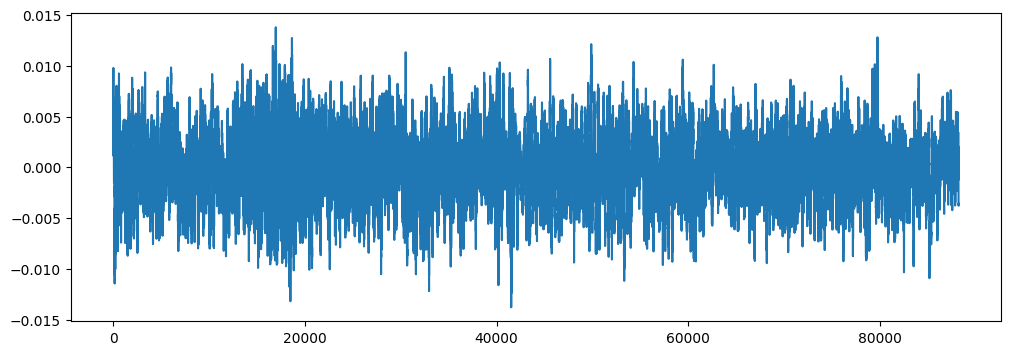

In [3]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt

# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation

Here Librosa converts the signal to mono, meaning the channel will alays be 1


In [4]:
### Lets read with scipy
from scipy.io import wavfile as wav

wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [5]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], shape=(176400, 2), dtype=int16)

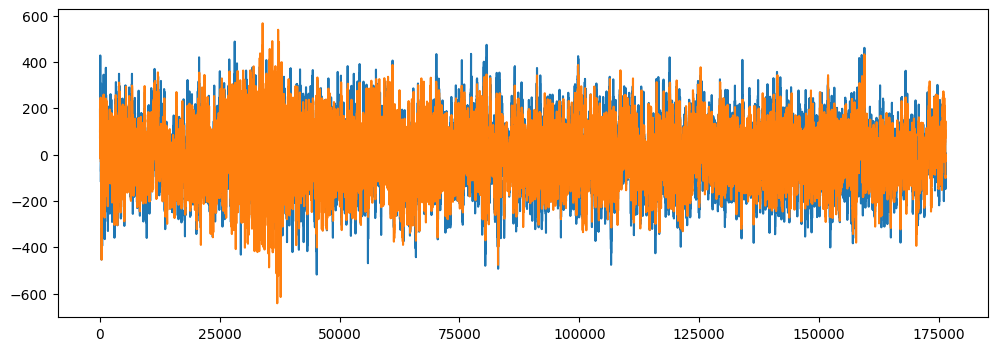

In [6]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.


In [7]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125225e+02, ...,
         1.1112499e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682455e+01, -3.0259777e+01, ...,
        -8.2357607e+00, -9.0665302e+00, -4.5019555e+00],
       ...,
       [-2.8760433e+00, -3.2479773e+00, -4.8965535e+00, ...,
        -5.2023804e-01,  3.5672479e+00,  7.4937582e+00],
       [-4.2968345e-01, -5.8838868e-01, -8.1724250e-01, ...,
         1.8340737e-01,  7.6732510e-01,  2.7120006e+00],
       [-1.1780639e+00,  6.9809639e-01,  6.3521624e+00, ...,
        -2.6221919e+00, -4.7912736e+00, -3.1826315e+00]],
      shape=(40, 173), dtype=float32)

In [13]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path = "C:/DESKTOP CLONE/Projects/AcoustiClass/archive/"
metadata = pd.read_csv(
    "C:/DESKTOP CLONE/Projects/AcoustiClass/archive/UrbanSound8K.csv"
)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
import numpy as np


def features_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(
        y=audio, sr=sample_rate, hop_length=512, n_fft=1024, n_mfcc=40
    )
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [15]:
import numpy as np
from tqdm import tqdm

### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]) + "/",
        str(row["slice_file_name"]),
    )
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

8732it [01:02, 139.98it/s]


In [16]:
### converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=["feature", "class"])
extracted_features_df.head()

,feature,class
0,"[-297.3973, 62.766853, -117.660324, -57.296165...",dog_bark
1,"[-490.71515, 98.969734, -42.70029, 51.263252, ...",children_playing
2,"[-525.64197, 111.47852, -37.607727, 43.46369, ...",children_playing
3,"[-480.8334, 91.745125, -24.20152, 42.913536, 1...",children_playing
4,"[-512.5282, 103.20618, -42.739483, 50.84463, 1...",children_playing


In [17]:
### Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())

In [18]:
X.shape

(8732, 40)

In [19]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], shape=(8732,), dtype='<U16')

In [20]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [21]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(8732, 10))

In [22]:
### Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train

array([[-1.96456482e+02,  1.02344086e+02, -1.26829700e+01, ...,
         4.62724018e+00, -3.01694727e+00,  4.39803696e+00],
       [-7.58954468e+01,  8.01268005e+01,  6.97066784e+00, ...,
        -3.27810693e+00, -4.99339294e+00, -1.41163182e+00],
       [-1.12947037e+02, -1.45150404e+01, -6.75028849e+00, ...,
         1.94652224e+00, -1.01999021e+00,  2.69367313e+00],
       ...,
       [-4.95266876e+02,  8.56042480e+01,  5.77523947e+00, ...,
         8.73308837e-01,  3.52582991e-01,  7.04829633e-01],
       [-2.09732864e+02,  1.22762596e+02, -2.13189678e+01, ...,
         1.34020746e+00, -1.86205876e+00, -8.58021975e-01],
       [-4.88472534e+02,  2.08013733e+02,  8.57720375e+00, ...,
        -3.06268978e+00, -3.56066036e+00,  3.94936413e-01]],
      shape=(6985, 40), dtype=float32)

In [24]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(8732, 10))

In [25]:
X_train.shape

(6985, 40)

In [26]:
X_test.shape

(1747, 40)

In [27]:
y_train.shape

(6985, 10)

In [28]:
y_test.shape

(1747, 10)

### Model Creation


In [29]:
import tensorflow as tf

print(tf.__version__)

2.20.0


In [30]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels = y.shape[1]

In [32]:
model = Sequential()
model.add(Conv1D(128, 3, activation="relu", input_shape=(40, 1)))
model.add(Dense(128, activation="relu"))
model.add(MaxPooling1D())
model.add(Conv1D(128, 3, activation="relu", input_shape=(40, 1)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

C:\Users\ahamg\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,794 (776.54 KB)

 Trainable params: 198,794 (776.54 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

Epoch 1/40
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2828 - loss: 2.1619
Epoch 1: val_loss improved from None to 1.22292, saving model to C:/MINE/STUDY/DSP/Audio-Classification-main/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3966 - loss: 1.7469 - val_accuracy: 0.5953 - val_loss: 1.2229
Epoch 2/40
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5570 - loss: 1.2951
Epoch 2: val_loss improved from 1.22292 to 0.90719, saving model to C:/MINE/STUDY/DSP/Audio-Classification-main/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5903 - loss: 1.2033 - val_accuracy: 0.7058 - val_loss: 0.9072
Epoch 3/40
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6539 - loss: 1.0028
Epoch 3: val_loss improved from 0.90719 to 0.79591, saving model to C:/MINE/STUDY/DSP/Audio-Classification-main/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6750 - loss: 0.9523 - val_accuracy: 0.7

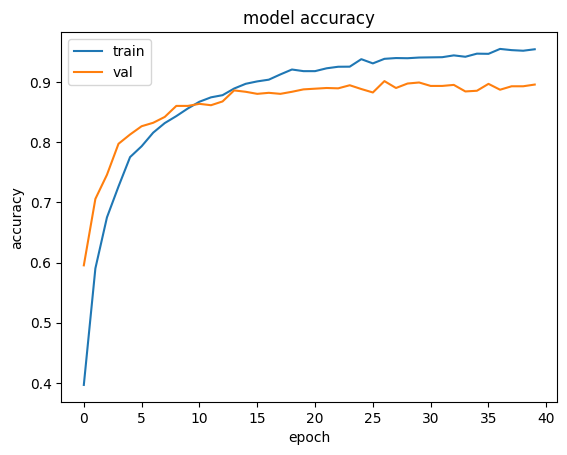

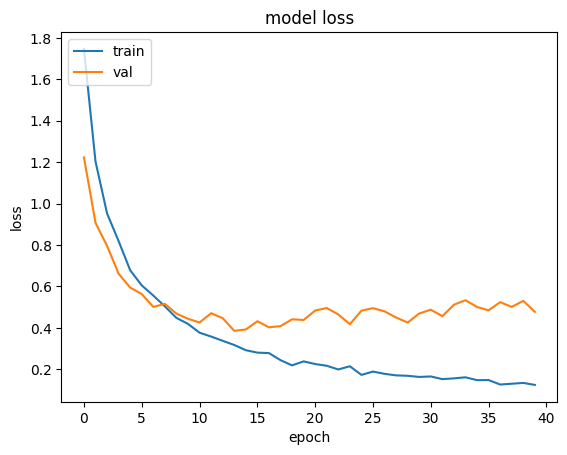

Training completed in time:  0:00:40.344981


In [35]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 40
num_batch_size = 32

checkpointer = ModelCheckpoint(
    filepath="C:/MINE/STUDY/DSP/Audio-Classification-main/audio_classification.keras",
    verbose=1,
    save_best_only=True,
)
start = datetime.now()

history = model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1,
)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

duration = datetime.now() - start
print("Training completed in time: ", duration)

In [36]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.8958213925361633


[[187   0   4   0   0   0   0   1   0   3]
 [  1  78   1   1   0   0   0   2   1   7]
 [  5   1 165  12   5   0   2   0   1  14]
 [  3   0   7 159   0   3   1   0   5   4]
 [  0   1   2   3 178   0   0   8   0  10]
 [  1   0   2   1   0 208   0   1   0   3]
 [  0   0   3   6   1   0  74   2   0   1]
 [  0   0   0   1   4   0   0 173   0   9]
 [  0   1   2   2   1   1   0   1 188   3]
 [  2   1  12   4   4   2   0   2   1 155]]


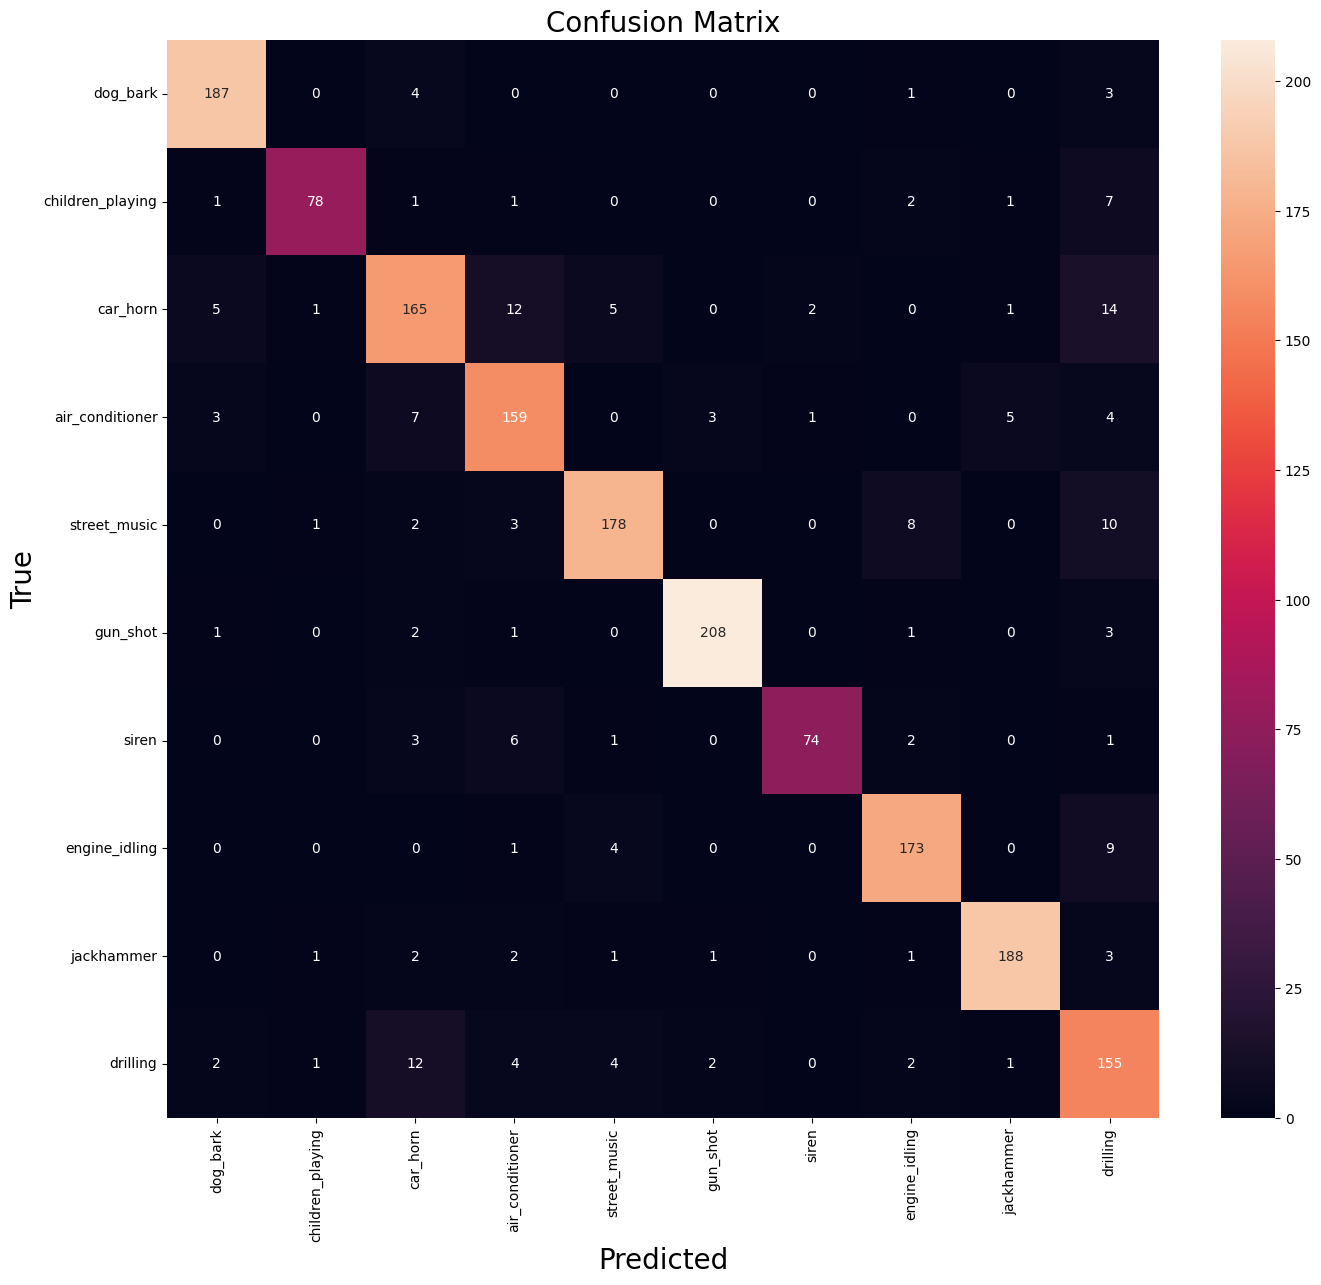

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(X_test, steps=len(X_test), verbose=0)
y_pred = np.argmax(predictions, axis=-1)
y_true = np.argmax(y_test, axis=-1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

class_names = extracted_features_df["class"].unique()

fig = plt.figure(figsize=(16, 14))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="g")
# annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel("Predicted", fontsize=20)
ax.xaxis.set_label_position("bottom")
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize=10)
ax.xaxis.tick_bottom()

ax.set_ylabel("True", fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize=10)
plt.yticks(rotation=0)

plt.title("Confusion Matrix", fontsize=20)

plt.savefig("ConMat24.png")
plt.show()

In [38]:
X_test[1]

array([-5.2842236e+02, -2.9238302e-01, -3.1054762e+01,  3.2384583e+01,
       -1.1558121e+01, -2.2558693e+01,  1.1061945e+00, -2.1712975e+01,
       -1.8757557e+01,  4.8652387e+00, -2.6897722e+01, -2.3240334e+01,
       -2.2648203e+00, -1.0486784e+01, -1.2665656e+01, -8.2283449e+00,
       -4.2056723e+00,  9.4349966e+00,  1.7126377e+01,  2.3277826e+01,
        2.1706182e+01, -1.6798205e+00, -1.8482641e+01, -5.7610135e+00,
       -1.7683630e-01,  3.9954994e+00, -6.8844118e+00, -1.7402578e+01,
       -9.9878960e+00,  1.3084877e+01,  6.2829447e-01, -2.4771635e+01,
       -1.5834707e+01,  1.0767063e+01,  1.1181173e+01, -2.5929415e-01,
       -2.5417440e+00,  1.6707846e+01,  1.5182468e+01, -5.5827751e+00],
      dtype=float32)

### Testing Some Test Audio Data

Steps

- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label


In [40]:
filename = "C:/DESKTOP CLONE/Projects/AcoustiClass/archive/dog_bark.wav"
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_label, axis=1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-3.9939822e+02  1.5942841e+02 -2.7856270e+01 -8.4891081e+00
 -9.8584759e-01 -1.8366421e+01 -2.6521648e+01 -1.1170909e+01
 -2.0993752e+01 -1.3291892e+01 -1.1056151e+01 -1.5398322e+01
 -1.3041115e+01 -1.5514869e+01 -2.0157013e+00  1.0880282e+01
 -1.3867179e-01  1.8654569e+00 -3.9883447e+00 -5.5058913e+00
 -4.1139870e+00 -3.0888238e+00 -2.5097039e+00 -1.8675386e+00
 -2.5147800e+00  6.9922346e-01 -6.4020056e-01 -4.9654169e+00
 -9.9697840e-01  1.1621059e+00 -1.3482623e+00 -4.0017157e+00
 -5.4510865e+00 -3.3496461e+00 -4.8559322e+00 -7.8959002e+00
 -5.9181089e+00 -6.1213160e+00 -7.3206143e+00 -6.9496999e+00]
[[-3.9939822e+02  1.5942841e+02 -2.7856270e+01 -8.4891081e+00
  -9.8584759e-01 -1.8366421e+01 -2.6521648e+01 -1.1170909e+01
  -2.0993752e+01 -1.3291892e+01 -1.1056151e+01 -1.5398322e+01
  -1.3041115e+01 -1.5514869e+01 -2.0157013e+00  1.0880282e+01
  -1.3867179e-01  1.8654569e+00 -3.9883447e+00 -5.5058913e+00
  -4.1139870e+00 -3.0888238e+00 -2.5097039e+00 -1.8675386e+00
  -2.5147800e+00 

array(['dog_bark'], dtype='<U16')